# DECISION TREE

IMPORTING LIBRARIRES

In [69]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
######## for plotting and visualization
from sklearn import tree

LOADING DATA

In [70]:
dataset=pd.read_csv('/content/drive/My Drive/data/Position_Salaries.csv')
dataset.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


EXTRACTING COLUMNS

In [71]:
x=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2:3].values

x=np.array(x).reshape(-1,1)
y=np.array(y).reshape(-1,1)
x


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

SPLITTING DATA INTO TRAIN AND TEXT

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train

array([[ 5],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 4],
       [ 1],
       [ 6]])

SCALING DATA

In [73]:
sc_x= StandardScaler()
sc_y= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
y_train=sc_y.fit_transform(y_train)


TRAINING MODEL

In [79]:
modelDT=DecisionTreeRegressor(random_state=0)
modelDT.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

VISUALIZING DECISION TREE

[Text(392.34375, 403.81714285714287, 'X[0] <= 8.5\nmse = 80662250000.0\nsamples = 10\nvalue = 249500.0'),
 Text(296.4375, 341.69142857142856, 'X[0] <= 6.5\nmse = 6921484375.0\nsamples = 8\nvalue = 124375.0'),
 Text(209.25, 279.5657142857143, 'X[0] <= 4.5\nmse = 1381250000.0\nsamples = 6\nvalue = 82500.0'),
 Text(139.5, 217.44, 'X[0] <= 3.5\nmse = 179687500.0\nsamples = 4\nvalue = 58750.0'),
 Text(104.625, 155.3142857142857, 'X[0] <= 2.5\nmse = 38888888.889\nsamples = 3\nvalue = 51666.667'),
 Text(69.75, 93.18857142857144, 'X[0] <= 1.5\nmse = 6250000.0\nsamples = 2\nvalue = 47500.0'),
 Text(34.875, 31.062857142857126, 'mse = 0.0\nsamples = 1\nvalue = 45000.0'),
 Text(104.625, 31.062857142857126, 'mse = 0.0\nsamples = 1\nvalue = 50000.0'),
 Text(139.5, 93.18857142857144, 'mse = 0.0\nsamples = 1\nvalue = 60000.0'),
 Text(174.375, 155.3142857142857, 'mse = 0.0\nsamples = 1\nvalue = 80000.0'),
 Text(279.0, 217.44, 'X[0] <= 5.5\nmse = 400000000.0\nsamples = 2\nvalue = 130000.0'),
 Text(244.1

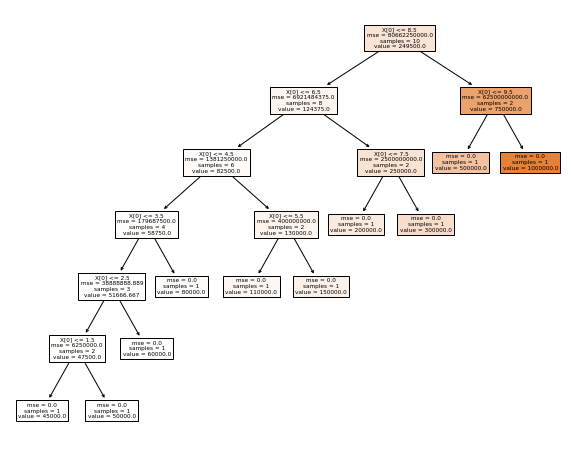

In [80]:
plt.figure(figsize=(10,8))
tree.plot_tree(modelDT,filled=True)

PREDICTING MODEL

In [81]:
y_pred=modelDT.predict([[5.5]])
y_pred

array([110000.])

FINDING MEAN SQUARE AND R ERROR

In [82]:
mse=mean_squared_error(y_test,modelDT.predict(x_test))
print('mean square error : \t',math.sqrt(mse))
print('r square error : \t ',modelDT.score(x_test,y_test))

mean square error : 	 321908.37205639743
r square error : 	  -1.1410123966942147


VISUALIZATION

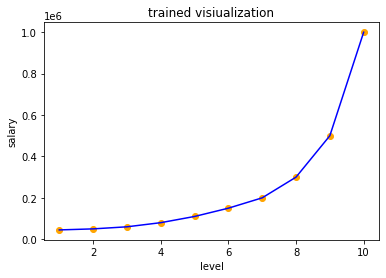

In [83]:
plt.scatter(x,y,color='orange')
plt.plot(x,modelDT.predict(x),color='blue')
plt.title('trained visiualization')
plt.xlabel('level')
plt.ylabel('salary')
plt.show()